In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os


In [53]:
# Veri setinin yolu
base_dir = r'C:\Users\1must\Desktop\MeyveVeriseti\dataset'  

# Eğitim ve test veri yolları
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [54]:
# Eğitim ve test veri setlerini yükle
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),  # Resim boyutunu değiştirin
    batch_size=32
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32
)

Found 23619 files belonging to 18 classes.
Found 6738 files belonging to 14 classes.


In [55]:
# Veri artırma uygulamak için bir ön işleme katmanı oluşturun
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [56]:
# Modeli oluştur
model = keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Resimleri normalleştir
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_ds.class_names), activation='softmax')  # Sınıf sayısını değiştirin
])

In [57]:
# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [58]:
# Modeli eğit
history = model.fit(
    train_ds,
    validation_data=test_ds,  # Test verisi doğrulama için kullanılıyor
    epochs=10  # Eğitim döngüsü sayısını değiştirin
)

Epoch 1/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 264s 354ms/step - accuracy: 0.5750 - loss: 1.4084 - val_accuracy: 0.2293 - val_loss: 9.3106
Epoch 2/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 785s 1s/step - accuracy: 0.8424 - loss: 0.4203 - val_accuracy: 0.2392 - val_loss: 11.4939
Epoch 3/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 274s 370ms/step - accuracy: 0.8800 - loss: 0.3220 - val_accuracy: 0.2438 - val_loss: 11.6252
Epoch 4/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 296s 401ms/step - accuracy: 0.8961 - loss: 0.2747 - val_accuracy: 0.2430 - val_loss: 11.7645
Epoch 5/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 322s 435ms/step - accuracy: 0.9127 - loss: 0.2343 - val_accuracy: 0.2484 - val_loss: 15.1863
Epoch 6/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 317s 429ms/step - accuracy: 0.9166 - loss: 0.2182 - val_accuracy: 0.2484 - val_loss: 14.3099
Epoch 7/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 308s 416ms/step - accuracy: 0.9271 - loss: 0.1876 - val_accuracy: 0.2361 - val_loss: 16.2678
Epoch 8/10
739/739 ━━━━━━━━━━━━━━━━━━━━ 304s 411ms/step - accuracy: 0.925

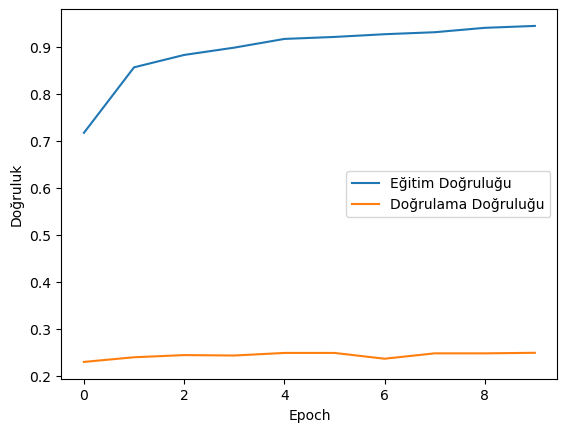

In [59]:
# Eğitim sonuçlarını görselleştir
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [60]:
model.save('fruit_vegetable_model.keras')